In [2]:
import pandas as pd
import numpy as np

In [11]:
messages = pd.read_csv('../DataSet/SMSSpamCollection.csv',  sep='\t',names=["label", "message"])

In [12]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
lemmatizer = WordNetLemmatizer()

In [20]:
corpus = []

for i in range(len(messages)):
    text = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [21]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

Let's try with both the approaches for creating word vectors (bag of words and TF-IDF)
Bag Of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# let's keep the features to all for now
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [23]:
X.shape

(5572, 7098)

In [24]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [25]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
# training model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)

In [28]:
cfm


array([[943,  23],
       [  6, 143]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [30]:
accuracy

0.9739910313901345

In [31]:
# trying with less number of features (example: 2500)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [32]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
# training model using Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [34]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[954,  12],
       [  6, 143]], dtype=int64)

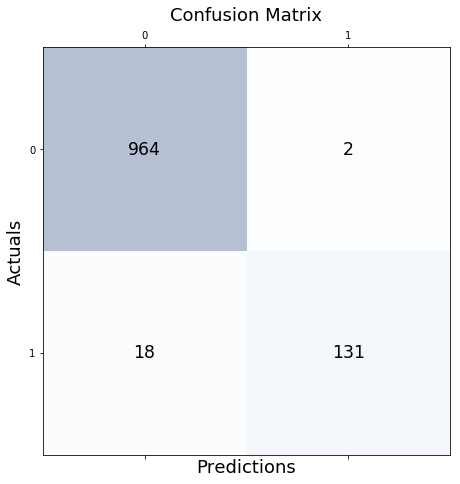

In [51]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cfm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(x=j, y=i,s=cfm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [35]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9838565022421525

We got boost in accuracy (i know that accuracy is not an ideal metric for this problem, but still) and we have less misclassifications as seen in the confusion matrix

TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(corpus).toarray()

In [37]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:, 1].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[964,   2],
       [ 18, 131]], dtype=int64)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9820627802690582

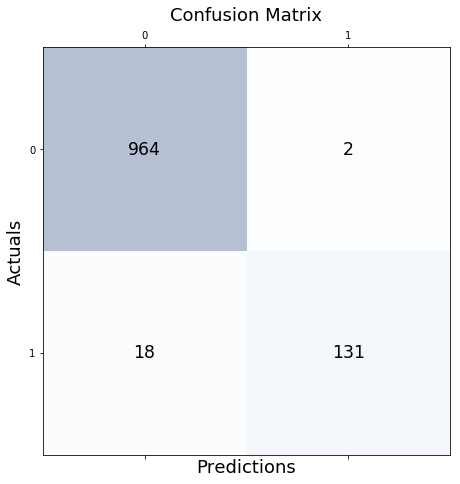

In [50]:
# from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cfm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cfm.shape[0]):
    for j in range(cfm.shape[1]):
        ax.text(x=j, y=i,s=cfm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()